In [1]:
# GOAL: HAVE EACH ANALYSIS SECTION COMPUTE A STANDARD SET OF CALCULATIONS FOR RISK METRICS AND CORRELATION

"""
For now, we keep it simple. If we need to expand, we can. 
We are taking what we need to in order to understand how each basket of currencies 
is correlated to the market proxy (bitcoin)
"""

'\nFor now, we keep it simple. If we need to expand, we can. \nWe are taking what we need to in order to understand how each basket of currencies \nis correlated to the market proxy (bitcoin)\n'

In [2]:
# STEP 1: IMPORT DEPENDENCIES
#For basic calculations:
import pandas as pd
import numpy as np
import csv
from pathlib import Path

#For Heatmap:
import seaborn as sns
%matplotlib inline

In [3]:
# STEP 2: IMPORT DATA AS DATAFRAME
"""
Determnine if we are reading csv data, running individual api calls, or querying an in-house database
"""
#reading in csv data
df_2018 = pd.read_csv(
    Path('2018_data.csv'),
)

In [4]:
# View the dataframe
df_2018.describe()

,Unnamed: 0,price_open,price_close,volume_traded,price_open.1,price_close.1,volume_traded.1,price_open.2,price_close.2,volume_traded.2,...,volume_traded.5,price_open.6,price_close.6,volume_traded.6,price_open.7,price_close.7,volume_traded.7,price_open.8,price_close.8,volume_traded.8
count,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,1.200000e+01,12.0000,12.000000,1.200000e+01,...,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,5.500000,8003.775000,7146.175000,197638.688179,503.97000,452.714167,2.191600e+06,111.7625,95.025833,5.757668e+05,...,3.349103e+08,234.675833,199.300000,69306.733373,371.898500,292.644750,50265.102545,0.041148,0.019545,2.949424e+07
std,3.605551,2578.202017,2072.802689,100047.827686,295.99537,303.593291,1.278655e+06,62.8595,54.611350,3.428206e+05,...,1.972352e+08,125.287163,108.777121,32372.876610,274.150662,193.198831,24559.342212,0.087040,0.031242,5.627548e+07
min,0.000000,3969.400000,3691.900000,80038.919050,111.81000,111.640000,1.095661e+06,31.6200,29.770000,2.451401e+05,...,1.162611e+08,80.250000,55.020000,27875.666940,90.703000,77.073000,21546.518090,0.000000,0.000000,0.000000e+00
25%,2.750000,6549.600000,6367.800000,123154.472875,269.18250,223.190000,1.436023e+06,61.8100,58.075000,3.182792e+05,...,1.959945e+08,145.017500,126.192500,48864.819033,192.925500,177.782250,35547.098832,0.000000,0.000000,0.000000e+00
50%,5.500000,7252.850000,6963.450000,148693.689550,442.38000,412.035000,1.723169e+06,98.6050,79.905000,4.968564e+05,...,3.170520e+08,196.070000,177.400000,58343.475440,271.854500,228.300000,47269.879660,0.000000,0.000000,0.000000e+00
75%,8.250000,9461.250000,8105.300000,258272.417250,688.69500,600.547500,2.212861e+06,151.8900,125.730000,7.958817e+05,...,3.934784e+08,308.315000,250.675000,89149.688080,500.106250,346.664250,61460.019500,0.046387,0.039125,2.058818e+07
max,11.000000,13971.100000,10310.000000,364738.920100,1105.30000,1105.300000,5.550937e+06,230.3200,201.840000,1.374386e+06,...,7.654455e+08,479.760000,393.930000,142754.996200,1027.191000,689.500000,112577.020200,0.300000,0.085512,1.601121e+08


In [5]:
# Clean the dataframe to only include the closing price
final_2018_df = pd.DataFrame()
final_2018_df['BTC_Monthly_Close'] = df_2018['price_close']
final_2018_df['ETH_Monthly_Close'] = df_2018['price_close.1']
final_2018_df['LTC_Monthly_Close'] = df_2018['price_close.2']
final_2018_df['USDT_Monthly_Close'] = df_2018['price_close.3']
final_2018_df['XLM_Monthly_Close'] = df_2018['price_close.4']
final_2018_df['XRP_Monthly_Close'] = df_2018['price_close.5']
final_2018_df['ZEC_Monthly_Close'] = df_2018['price_close.6']
final_2018_df['DASH_Monthly_Close'] = df_2018['price_close.7']
final_2018_df['ADA_Monthly_Close'] = df_2018['price_close.8']

final_2018_df

,BTC_Monthly_Close,ETH_Monthly_Close,LTC_Monthly_Close,USDT_Monthly_Close,XLM_Monthly_Close,XRP_Monthly_Close,ZEC_Monthly_Close,DASH_Monthly_Close,ADA_Monthly_Close
0,10101.6,1105.30,162.30,0.9850,0.017060,1.12020,393.93,689.500,0.000000
1,10310.0,850.10,201.84,0.9999,0.330001,0.88697,380.30,582.368,0.000000
2,6911.1,392.40,115.84,0.9972,0.203963,0.49841,184.13,303.719,0.000000
3,9243.2,669.57,148.38,1.0002,0.424000,0.83101,284.41,473.475,0.000000
4,7485.6,577.54,118.18,0.9987,0.296636,0.61108,239.43,304.394,0.000000
5,6387.9,453.05,81.06,0.9987,0.192017,0.46871,170.67,239.024,0.000000
6,7726.0,431.67,78.75,0.9980,0.275147,0.43454,209.23,217.576,0.000000
7,7015.8,281.60,62.16,0.9998,0.223409,0.33500,150.01,195.100,0.000000
8,6604.1,231.96,60.96,0.9964,0.259670,0.57920,129.87,186.310,0.085512
9,6307.5,196.88,49.42,0.9919,0.224888,0.45000,115.16,152.199,0.069731


In [6]:
# STEP 3: CALCULATE Monthly RETURNS FOR EACH CURRENCY IN Designated Time range from  DATAFRAME, DROP NULL VALUES
"""

Will need: .pct_change().dropna(inplace = True)

"""
btc_2018_df = final_2018_df['BTC_Monthly_Close'].pct_change().fillna(0)
btc_2018_df

0     0.000000
1     0.020630
2    -0.329670
3     0.337443
4    -0.190151
5    -0.146642
6     0.209474
7    -0.091923
8    -0.058682
9    -0.044911
10   -0.370686
11   -0.069910
Name: BTC_Monthly_Close, dtype: float64

In [7]:
eth_2018_df = final_2018_df['ETH_Monthly_Close'].pct_change().fillna(0)
eth_2018_df

0     0.000000
1    -0.230888
2    -0.538407
3     0.706346
4    -0.137446
5    -0.215552
6    -0.047191
7    -0.347650
8    -0.176278
9    -0.151233
10   -0.432954
11    0.172161
Name: ETH_Monthly_Close, dtype: float64

In [8]:
ltc_2018_df = final_2018_df['LTC_Monthly_Close'].pct_change().fillna(0)
ltc_2018_df

0     0.000000
1     0.243623
2    -0.426080
3     0.280905
4    -0.203531
5    -0.314097
6    -0.028497
7    -0.210667
8    -0.019305
9    -0.189304
10   -0.359571
11   -0.059400
Name: LTC_Monthly_Close, dtype: float64

In [9]:
usdt_2018_df = final_2018_df['USDT_Monthly_Close'].pct_change().fillna(0)
usdt_2018_df

0     0.000000
1     0.015127
2    -0.002700
3     0.003008
4    -0.001500
5     0.000000
6    -0.000701
7     0.001804
8    -0.003401
9    -0.004516
10   -0.007561
11    0.014933
Name: USDT_Monthly_Close, dtype: float64

In [10]:
xlm_2018_df = final_2018_df['XLM_Monthly_Close'].pct_change().fillna(0)
xlm_2018_df

0      0.000000
1     18.343552
2     -0.381932
3      1.078808
4     -0.300387
5     -0.352685
6      0.432930
7     -0.188038
8      0.162308
9     -0.133947
10    -0.303066
11    -0.302504
Name: XLM_Monthly_Close, dtype: float64

In [11]:
xrp_2018_df = final_2018_df['XRP_Monthly_Close'].pct_change().fillna(0)
xrp_2018_df

0     0.000000
1    -0.208204
2    -0.438076
3     0.667322
4    -0.264654
5    -0.232981
6    -0.072902
7    -0.229070
8     0.728955
9    -0.223066
10   -0.202911
11   -0.030221
Name: XRP_Monthly_Close, dtype: float64

In [12]:
zec_2018_df = final_2018_df['ZEC_Monthly_Close'].pct_change().fillna(0)
zec_2018_df

0     0.000000
1    -0.034600
2    -0.515830
3     0.544615
4    -0.158152
5    -0.287182
6     0.225933
7    -0.283038
8    -0.134258
9    -0.113267
10   -0.310177
11   -0.307402
Name: ZEC_Monthly_Close, dtype: float64

In [13]:
dash_2018_df = final_2018_df['DASH_Monthly_Close'].pct_change().fillna(0)
dash_2018_df

0     0.000000
1    -0.155376
2    -0.478476
3     0.558925
4    -0.357106
5    -0.214755
6    -0.089732
7    -0.103302
8    -0.045054
9    -0.183087
10   -0.402105
11   -0.153035
Name: DASH_Monthly_Close, dtype: float64

In [14]:
ada_2018_df = final_2018_df['ADA_Monthly_Close'].drop(labels=[0, 1, 2, 3, 4, 5, 6, 7]).pct_change().fillna(0)
ada_2018_df

8     0.000000
9    -0.184547
10   -0.446444
11    0.054404
Name: ADA_Monthly_Close, dtype: float64

In [15]:
# Step 4: Calculate the variance of bitcoin, in this case being used as a proxy for the market.
# assign to market variance value
market_var = btc_2018_df.var()
market_var

0.03960906449096394

In [16]:
# Calcualte the variance of the remaining crypto currencies.

In [17]:
btc_var_2018 = btc_2018_df.var()
btc_var_2018

0.03960906449096394

In [18]:
eth_var_2018 = eth_2018_df.var()
eth_var_2018

0.10349719596024033

In [19]:
ltc_var_2018 = ltc_2018_df.var()
ltc_var_2018

0.04875514501258864

In [20]:
usdt_var_2018 = usdt_2018_df.var()
usdt_var_2018

4.961654022047864e-05

In [21]:
xlm_var_2018 = xlm_2018_df.var()
xlm_var_2018

28.299571049446936

In [22]:
xrp_var_2018 = xrp_2018_df.var()
xrp_var_2018

0.13314435054374082

In [23]:
zec_var_2018 = zec_2018_df.var()
zec_var_2018

0.07880994075293156

In [24]:
dash_var_2018 = dash_2018_df.var()
dash_var_2018

0.06899686209898444

In [25]:
ada_var_2018 = ada_2018_df.var()
ada_var_2018

0.05107222784251709

In [26]:
# STEP 5B: CALCULATE COVARIANCE OF EACH CURRENCY RELATIVE TO BITCOIN
"""
Use monthly returns of currency and monthly returns of bitcoin as market proxy

"""

# market_cov = final_2018_df['BTC_Monthly_Close'].cov(final_2018_df['BTC_Monthly_Close'])
# market_cov

mkt_2018_cov = btc_2018_df.cov(btc_2018_df)
mkt_2018_cov

0.03960906449096394

In [27]:
eth_2018_cov = eth_2018_df.cov(btc_2018_df)
eth_2018_cov

0.05189034652482842

In [28]:
ltc_2018_cov = ltc_2018_df.cov(btc_2018_df)
ltc_2018_cov

0.03697705602745253

In [29]:
usdt_2018_cov = usdt_2018_df.cov(btc_2018_df)
usdt_2018_cov

0.0004762717938323698

In [30]:
xlm_2018_cov = xlm_2018_df.cov(btc_2018_df)
xlm_2018_cov

0.21100782904329352

In [31]:
xrp_2018_cov = xrp_2018_df.cov(btc_2018_df)
xrp_2018_cov

0.04265196190809218

In [32]:
zec_2018_cov = zec_2018_df.cov(btc_2018_df)
zec_2018_cov

0.051269052517060855

In [33]:
dash_2018_cov = dash_2018_df.cov(btc_2018_df)
dash_2018_cov

0.045857740669386166

In [34]:
ada_2018_cov = ada_2018_df.cov(btc_2018_df)
ada_2018_cov

0.030510765635409158

In [35]:
# STEP 6: CALCULATE BETA OF EACH CURRENCY

"""
beta = covariance of asset to market / variance of market

use previous calculations for market variance and covariance of assets
"""
btc_beta_2018 = mkt_2018_cov / btc_var_2018
btc_beta_2018


1.0

In [36]:
ada_beta_2018 = ada_2018_cov / btc_var_2018
ada_beta_2018

0.7702975575797709

In [37]:
ltc_beta_2018 = ltc_2018_cov / btc_var_2018
ltc_beta_2018

0.9335503502206709

In [38]:
usdt_beta_2018 = usdt_2018_cov / btc_var_2018
usdt_beta_2018

0.012024313120069326

In [39]:
xlm_beta_2018 = xlm_2018_cov / btc_var_2018
xlm_beta_2018

5.327261114471183

In [40]:
xrp_beta_2018 = xrp_2018_cov / btc_var_2018
xrp_beta_2018

1.0768232589240379

In [41]:
zec_beta_2018 = zec_2018_cov / btc_var_2018
zec_beta_2018

1.294376758854199

In [42]:
dash_beta_2018 = dash_2018_cov / btc_var_2018
dash_beta_2018

1.157758741811429

In [43]:
ada_beta_2018 = ada_2018_cov / btc_var_2018
ada_beta_2018

0.7702975575797709

<AxesSubplot:>

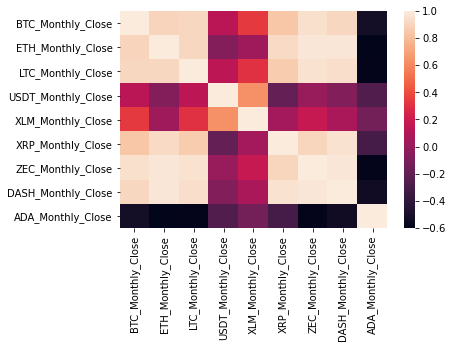

In [44]:
# Display Correlation Heatmap With Seaborn

"""
NEW CELL to check monthly returns are displayed with pct_change already applied
- Take dataframe of daily returns from step 3 (pct_change drop na already applied)

NEW CELL to check correlation dataframe
- correlation = monthly_returns_dataframe.corr()

NEW CELL to display heatmap
- sns.heatmap(correlation)


"""
correlation = final_2018_df.corr()
sns.heatmap(correlation)